In [57]:
import pandas as pd
import numpy as np

df = pd.read_csv('/content/weather_classification_data.csv')

In [58]:
df.head()

,Temperature,Humidity,Wind Speed,Precipitation (%),Cloud Cover,Atmospheric Pressure,UV Index,Season,Visibility (km),Location,Weather Type
0,14.0,73,9.5,82.0,partly cloudy,1010.82,2,Winter,3.5,inland,Rainy
1,39.0,96,8.5,71.0,partly cloudy,1011.43,7,Spring,10.0,inland,Cloudy
2,30.0,64,7.0,16.0,clear,1018.72,5,Spring,5.5,mountain,Sunny
3,38.0,83,1.5,82.0,clear,1026.25,7,Spring,1.0,coastal,Sunny
4,27.0,74,17.0,66.0,overcast,990.67,1,Winter,2.5,mountain,Rainy


In [59]:
df.describe()

,Temperature,Humidity,Wind Speed,Precipitation (%),Atmospheric Pressure,UV Index,Visibility (km)
count,13200.000000,13200.000000,13200.000000,13200.000000,13200.000000,13200.000000,13200.000000
mean,19.127576,68.710833,9.832197,53.644394,1005.827896,4.005758,5.462917
std,17.386327,20.194248,6.908704,31.946541,37.199589,3.856600,3.371499
min,-25.000000,20.000000,0.000000,0.000000,800.120000,0.000000,0.000000
25%,4.000000,57.000000,5.000000,19.000000,994.800000,1.000000,3.000000
50%,21.000000,70.000000,9.000000,58.000000,1007.650000,3.000000,5.000000
75%,31.000000,84.000000,13.500000,82.000000,1016.772500,7.000000,7.500000
max,109.000000,109.000000,48.500000,109.000000,1199.210000,14.000000,20.000000


In [60]:
df_cat = df.select_dtypes(include=['object'])
df_cat.head()

,Cloud Cover,Season,Location,Weather Type
0,partly cloudy,Winter,inland,Rainy
1,partly cloudy,Spring,inland,Cloudy
2,clear,Spring,mountain,Sunny
3,clear,Spring,coastal,Sunny
4,overcast,Winter,mountain,Rainy


<Axes: xlabel='Cloud Cover'>

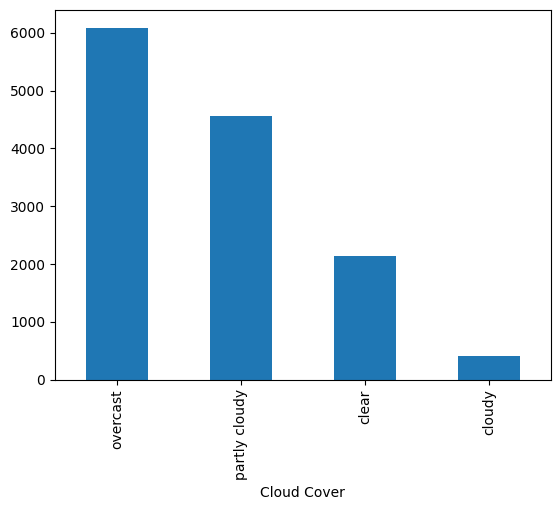

In [61]:
df['Cloud Cover'].value_counts().plot(kind = 'bar')

<Axes: xlabel='Season'>

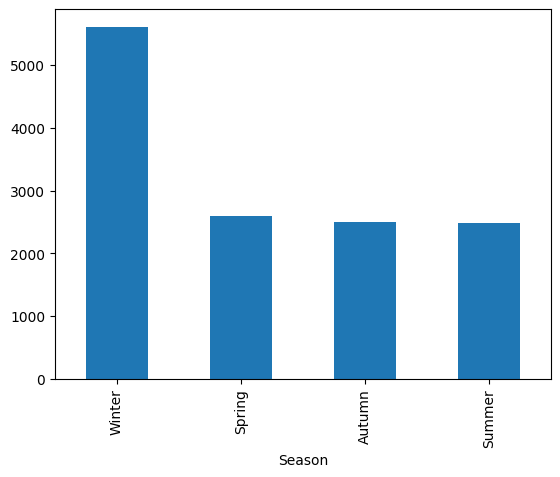

In [62]:
df.Season.value_counts().plot(kind = 'bar')

<Axes: xlabel='Location'>

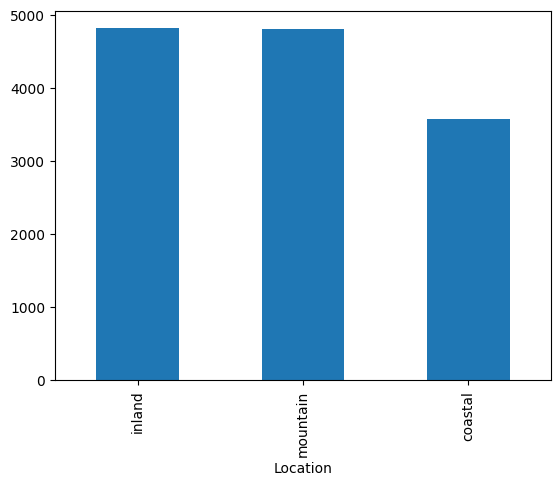

In [63]:
df.Location.value_counts().plot(kind = 'bar')

<Axes: xlabel='Weather Type'>

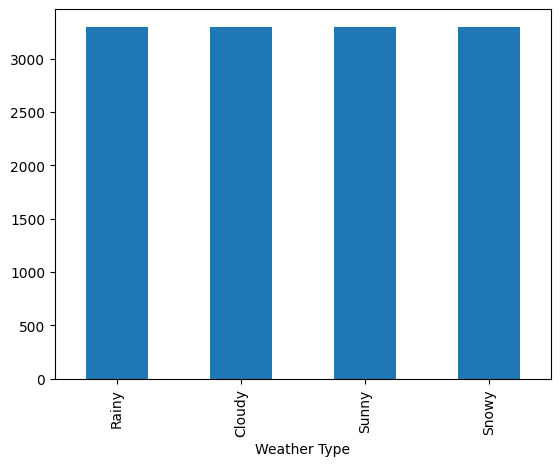

In [64]:
df['Weather Type'].value_counts().plot(kind = 'bar')

In [65]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

df['Weather Type'] = le.fit_transform(df['Weather Type'])

In [66]:
df['Weather Type'].unique()

array([1, 0, 3, 2])

In [67]:
ohe_features = ['Season', 'Location']



In [68]:
from sklearn import set_config
set_config(transform_output='pandas')

In [69]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(sparse_output=False, handle_unknown='ignore') # Handle unknown categories gracefully

encoded_data = ohe.fit_transform(df[ohe_features])

encoded_df = pd.DataFrame(encoded_data, columns=ohe.get_feature_names_out(ohe_features))

df = df.drop(ohe_features, axis=1)

df = pd.concat([df, encoded_df], axis=1)

In [70]:
df.head()

,Temperature,Humidity,Wind Speed,Precipitation (%),Cloud Cover,Atmospheric Pressure,UV Index,Visibility (km),Weather Type,Season_Autumn,Season_Spring,Season_Summer,Season_Winter,Location_coastal,Location_inland,Location_mountain
0,14.0,73,9.5,82.0,partly cloudy,1010.82,2,3.5,1,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1,39.0,96,8.5,71.0,partly cloudy,1011.43,7,10.0,0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,30.0,64,7.0,16.0,clear,1018.72,5,5.5,3,0.0,1.0,0.0,0.0,0.0,0.0,1.0
3,38.0,83,1.5,82.0,clear,1026.25,7,1.0,3,0.0,1.0,0.0,0.0,1.0,0.0,0.0
4,27.0,74,17.0,66.0,overcast,990.67,1,2.5,1,0.0,0.0,0.0,1.0,0.0,0.0,1.0


In [71]:
from sklearn.preprocessing import OrdinalEncoder

oe = OrdinalEncoder()

df['Cloud Cover'] = oe.fit_transform(df[['Cloud Cover']])

In [72]:
df.head()

,Temperature,Humidity,Wind Speed,Precipitation (%),Cloud Cover,Atmospheric Pressure,UV Index,Visibility (km),Weather Type,Season_Autumn,Season_Spring,Season_Summer,Season_Winter,Location_coastal,Location_inland,Location_mountain
0,14.0,73,9.5,82.0,3.0,1010.82,2,3.5,1,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1,39.0,96,8.5,71.0,3.0,1011.43,7,10.0,0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,30.0,64,7.0,16.0,0.0,1018.72,5,5.5,3,0.0,1.0,0.0,0.0,0.0,0.0,1.0
3,38.0,83,1.5,82.0,0.0,1026.25,7,1.0,3,0.0,1.0,0.0,0.0,1.0,0.0,0.0
4,27.0,74,17.0,66.0,2.0,990.67,1,2.5,1,0.0,0.0,0.0,1.0,0.0,0.0,1.0


In [73]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import layers,Sequential
from tensorflow.keras.layers import Dense,Dropout
from tensorflow.keras import regularizers
from tensorflow.keras.regularizers import l2

In [74]:
from sklearn.model_selection import train_test_split

x = df.drop('Weather Type', axis=1)
y = df['Weather Type']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [79]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [80]:
y_train

3958     1
2239     1
3608     3
6848     1
6119     0
        ..
11964    1
5191     1
5390     0
860      0
7270     1
Name: Weather Type, Length: 10560, dtype: int64

In [81]:
model = Sequential([
    Dense(128, activation='relu', input_shape=(x_train.shape[1],)),
    Dropout(0.2),
    Dense(64, activation='relu',kernel_regularizer=l2(0.01)),
    Dropout(0.2),
    Dense(32, activation='relu',kernel_regularizer=l2(0.01)),
    Dropout(0.2),
    Dense(4, activation='softmax')
])

In [82]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_18 (Dense)            (None, 128)               2048      
                                                                 
 dropout_12 (Dropout)        (None, 128)               0         
                                                                 
 dense_19 (Dense)            (None, 64)                8256      
                                                                 
 dropout_13 (Dropout)        (None, 64)                0         
                                                                 
 dense_20 (Dense)            (None, 32)                2080      
                                                                 
 dropout_14 (Dropout)        (None, 32)                0         
                                                                 
 dense_21 (Dense)            (None, 4)                

In [83]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [86]:
history = model.fit(x_train,y_train,epochs = 20,validation_split = 0.2)

Epoch 1/20
264/264 [==============================] - 2s 8ms/step - loss: 0.2420 - accuracy: 0.9084 - val_loss: 0.2307 - val_accuracy: 0.9200
Epoch 2/20
264/264 [==============================] - 1s 5ms/step - loss: 0.2407 - accuracy: 0.9100 - val_loss: 0.2281 - val_accuracy: 0.9176
Epoch 3/20
264/264 [==============================] - 1s 5ms/step - loss: 0.2389 - accuracy: 0.9110 - val_loss: 0.2372 - val_accuracy: 0.9143
Epoch 4/20
264/264 [==============================] - 1s 3ms/step - loss: 0.2437 - accuracy: 0.9083 - val_loss: 0.2306 - val_accuracy: 0.9176
Epoch 5/20
264/264 [==============================] - 1s 3ms/step - loss: 0.2449 - accuracy: 0.9099 - val_loss: 0.2263 - val_accuracy: 0.9181
Epoch 6/20
264/264 [==============================] - 1s 3ms/step - loss: 0.2413 - accuracy: 0.9087 - val_loss: 0.2283 - val_accuracy: 0.9186
Epoch 7/20
264/264 [==============================] - 1s 3ms/step - loss: 0.2351 - accuracy: 0.9094 - val_loss: 0.2260 - val_accuracy: 0.9186
Epoch 